In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We will begin by loading and inspecting the temperature dataset.

In [2]:
df_temp = pd.read_csv('../data/NSW/temperature_nsw.csv', header=0, names=['LOCATION', 'DATETIME', 'TEMP'])

print('Temperature DataFrame','\n')
print(df_temp,'\n')

print('\n', 'Temperature Summary','\n')
print(df_temp.describe(),'\n')

print('\n', 'DataFrame Info', '\n')
print(df_temp.info())

Temperature DataFrame 

         LOCATION         DATETIME  TEMP
0       Bankstown    1/1/2010 0:00  23.1
1       Bankstown    1/1/2010 0:01  23.1
2       Bankstown    1/1/2010 0:30  22.9
3       Bankstown    1/1/2010 0:50  22.7
4       Bankstown    1/1/2010 1:00  22.6
...           ...              ...   ...
220321  Bankstown  17/3/2021 23:00  19.1
220322  Bankstown  17/3/2021 23:20  19.0
220323  Bankstown  17/3/2021 23:30  18.8
220324  Bankstown  17/3/2021 23:34  18.8
220325  Bankstown   18/3/2021 0:00  18.6

[220326 rows x 3 columns] 


 Temperature Summary 

                TEMP
count  220326.000000
mean       17.418827
std         5.849763
min        -1.300000
25%        13.400000
50%        17.700000
75%        21.300000
max        44.700000 


 DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   LOCATION  220326 non-null 

From the above output, we can see that the dataframe consists of three columns, with each row containing a temperature reading from a given location, date and time.

It appears that the entirety of this temperature data relates to the location of Bankstown, but it will be best to confirm this.

Looking at the datetime column, the data type is currently 'object' and should be converted to 'datetime' to allow for us to analyse the data by time period. It also appears that the dataframe is sorted from oldest to newest, with dates ranging from 01/01/2010 to 18/03/2021. Ideally, this should also be confirmed through further inspection.

Another observation of the datetime is that the intervals are inconsistent, with readings appearing to occur every half hour but also sporadically in between. It will be useful to identify if there are any duplicate records.

The temperature values appear to be sensible, with a minimum of -1.3°C and a maximum of 44.7°C. Furthermore, there are no null values in any of the three columns, so this portion of the data appears to be clean.

In [3]:
# Converting 'DATETIME' column to 'datetime' Dtype,
# with 'dayfirst' parameter ensuring that '02/01/2010' is treated as the '2nd of January 2010'
df_temp['DATETIME'] = pd.to_datetime(df_temp['DATETIME'], dayfirst=True)

print('Temperature DataFrame - Datetime Formatted','\n')
print(df_temp,'\n' * 2)

print('DataFrame Info', '\n')
print(df_temp.info(), '\n' * 2)

print('All Locations')
print(df_temp['LOCATION'].unique(), '\n' * 2)

print('Date Range')
print(df_temp['DATETIME'].min())
print(df_temp['DATETIME'].max(), '\n' * 2)

duplicates_temp = df_temp[df_temp.duplicated(subset='DATETIME', keep=False)]
print("Duplicates records:")
print(duplicates_temp, '\n')
print('Duplicate records to remove:', int(len(duplicates_temp)/2))

Temperature DataFrame - Datetime Formatted 

         LOCATION            DATETIME  TEMP
0       Bankstown 2010-01-01 00:00:00  23.1
1       Bankstown 2010-01-01 00:01:00  23.1
2       Bankstown 2010-01-01 00:30:00  22.9
3       Bankstown 2010-01-01 00:50:00  22.7
4       Bankstown 2010-01-01 01:00:00  22.6
...           ...                 ...   ...
220321  Bankstown 2021-03-17 23:00:00  19.1
220322  Bankstown 2021-03-17 23:20:00  19.0
220323  Bankstown 2021-03-17 23:30:00  18.8
220324  Bankstown 2021-03-17 23:34:00  18.8
220325  Bankstown 2021-03-18 00:00:00  18.6

[220326 rows x 3 columns] 


DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220326 entries, 0 to 220325
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   LOCATION  220326 non-null  object        
 1   DATETIME  220326 non-null  datetime64[ns]
 2   TEMP      220326 non-null  float64       
dtypes: datetime64[ns](1), float64(

The above outputs confirm that the datetime column has been converted to datetime data type, and that all temperatures relate to Bankstown between the 1st of January 2010 and the 18th of March 2021.

It is also apparent that there are 13 rows where datetime has been duplicated. Given the temperature readings are the same for each duplicated pair, no decision needs to be made regarding aggregation or which records should be dropped.

We will now follow the same process for the demand dataset.

In [4]:
df_demand = pd.read_csv('../data/NSW/totaldemand_nsw - Copy.csv', header=0, names=['DATETIME', 'DEMAND', 'REGIONID'])

print('Demand DataFrame','\n')
print(df_demand,'\n')

print('\n', 'Demand Summary','\n')
print(df_demand.describe(),'\n')

print('\n', 'DataFrame Info', '\n')
print(df_demand.info())

Demand DataFrame 

               DATETIME   DEMAND REGIONID
0         1/1/2010 0:00  8038.00     NSW1
1         1/1/2010 0:30  7809.31     NSW1
2         1/1/2010 1:00  7483.69     NSW1
3         1/1/2010 1:30  7117.23     NSW1
4         1/1/2010 2:00  6812.03     NSW1
...                 ...      ...      ...
196508  17/3/2021 22:00  7419.77     NSW1
196509  17/3/2021 22:30  7417.91     NSW1
196510  17/3/2021 23:00  7287.32     NSW1
196511  17/3/2021 23:30  7172.39     NSW1
196512   18/3/2021 0:00  7094.51     NSW1

[196513 rows x 3 columns] 


 Demand Summary 

              DEMAND
count  196513.000000
mean     8113.145859
std      1299.532774
min      5074.630000
25%      7150.070000
50%      8053.230000
75%      8958.550000
max     14579.860000 


 DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DATETIME  196513 non-nul

The demand dataframe also consists of three columns, with each row containing an energy demand reading from a given region, date and time. According to the source of the data (AEMO), demand is measured in megawatts (MW). We also know from the data source the RegionID of 'NSW1' relates to the whole state of New South Wales.

As is the case with the raw temperature data, the demand datetime data type will need to be converted. The date range also appears to be the same, however there are fewer readings, as the intervals appear to be consistently 30 minutes with no readings in between. We will need to bear this in mind when merging these datasets.

Lastly, there are no null values in the demand dataframe for us to consider.

In [5]:
# Converting 'DATETIME' column to 'datetime' Dtype,
df_demand['DATETIME'] = pd.to_datetime(df_demand['DATETIME'], dayfirst=True)

print('Demand DataFrame - Datetime Formatted','\n')
print(df_demand,'\n' * 2)

print('All Regions')
print(df_demand['REGIONID'].unique(), '\n' * 2)

print('Date Range')
start_date = df_demand['DATETIME'].min()
print(start_date)
end_date = df_demand['DATETIME'].max()
print(end_date, '\n' * 2)

# Check that the 30 minute intervals are consistent throughout the entire dataframe
date_range = pd.date_range(start_date, end_date, freq='30T')
print('Number of rows given same date range and consistent 30min intervals:')
print(len(date_range), '\n' * 2)

# Check for duplicates
print('Number of duplicate records:', len(df_demand[df_demand.duplicated(subset='DATETIME')]), '\n' * 2)

print('DataFrame Info', '\n')
print(df_demand.info())

Demand DataFrame - Datetime Formatted 

                  DATETIME   DEMAND REGIONID
0      2010-01-01 00:00:00  8038.00     NSW1
1      2010-01-01 00:30:00  7809.31     NSW1
2      2010-01-01 01:00:00  7483.69     NSW1
3      2010-01-01 01:30:00  7117.23     NSW1
4      2010-01-01 02:00:00  6812.03     NSW1
...                    ...      ...      ...
196508 2021-03-17 22:00:00  7419.77     NSW1
196509 2021-03-17 22:30:00  7417.91     NSW1
196510 2021-03-17 23:00:00  7287.32     NSW1
196511 2021-03-17 23:30:00  7172.39     NSW1
196512 2021-03-18 00:00:00  7094.51     NSW1

[196513 rows x 3 columns] 


All Regions
['NSW1'] 


Date Range
2010-01-01 00:00:00
2021-03-18 00:00:00 


Number of rows given same date range and consistent 30min intervals:
196513 


Number of duplicate records: 0 


DataFrame Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196513 entries, 0 to 196512
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    ----------

The above outputs confirm that the datetime column has been converted to datetime data type, and that all demand readings relate to NSW between the 1st of January 2010 and the 18th of March 2021.

We can also conclude that the demand is consistently recorded every 30 minutes, with no readings occurring in between and no duplicate records.

Given the cleanliness of the demand data, with regular intervals and no missing values, we will keep these datetimes only when merging with the temperature data. However, prior to merging, we have to remove the duplicates from the temperature dataframe.

In [6]:
# Drop duplicate temperature records
df_temp = df_temp.drop_duplicates(subset='DATETIME')

# Take demand dataframe, and only add temperatures with matching datetimes
df_merge = df_demand.merge(df_temp, on='DATETIME', how='left')

print(df_merge, '\n')

print('Number of missing temperature readings:', df_merge['TEMP'].isnull().sum())

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5
...                    ...      ...      ...        ...   ...
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6

[196513 rows x 5 columns] 

Number of missing temperature readings: 579


After merging the datasets, we have found that there are 579 missing temperature readings. While this is a relatively small amount given the size of the data, it would be best to see where these null values are distributed, in case there are any large blocks of time missing.

In [7]:
# Add date column, ignoring time of day
df_merge['DATE'] = df_merge['DATETIME'].dt.date

# Create dataframe with temperatures that are null only
df_null = df_merge[df_merge['TEMP'].isnull()]

# Return dates along with number of missing temperatures
nulls_per_day = df_null.groupby('DATE').size().sort_values(ascending=False)

# Show those only with more than two missing temperatures
print(nulls_per_day[nulls_per_day > 10])


DATE
2016-07-17    48
2016-07-16    48
2016-07-18    48
2016-03-11    23
2016-07-19    22
2010-12-20    22
2010-06-17    19
2010-05-21    19
2018-05-21    14
2016-07-15    14
2016-03-10    11
dtype: int64


We can see there are three days from the 16th - 18th of July 2016 where there are no temperature readings.

*Need to decided how to treat all of these nulls, whether to drop or to fill.*

*Need to inspect and merge population data*

*Need to inspect and merge meteorological data*

*Need to inspect and merge ENSO data - work in progress*

In [8]:
df_enso = pd.read_csv('../data/enso/daily_enso.csv', header=0, names=['DATE', 'SOI', 'SST_DIFF', 'ENSO'])

print('ENSO DataFrame','\n')
print(df_enso,'\n')

print('\n', 'SOI Summary','\n')
print(df_enso.describe(),'\n')

print('\n', 'DataFrame Info', '\n')
print(df_enso.info())

ENSO DataFrame 

            DATE    SOI  SST_DIFF  ENSO
0     2009-12-31  13.80  1.590000     0
1     2010-01-01  11.17  1.590000     0
2     2010-01-02   8.91  1.590000     0
3     2010-01-03   4.48  1.590000     0
4     2010-01-04  14.09  1.550000     0
...          ...    ...       ...   ...
5363  2024-09-06   1.84 -0.080000     0
5364  2024-09-07  -5.82 -0.080000     0
5365  2024-09-08  -7.25 -0.080000     0
5366  2024-09-09  -0.53 -0.047692     0
5367  2024-09-10   6.24 -0.050833     0

[5368 rows x 4 columns] 


 SOI Summary 

               SOI     SST_DIFF         ENSO
count  5368.000000  5367.000000  5368.000000
mean      1.447422    -0.019599    -0.064270
std      15.429190     0.909960     0.454124
min     -80.410000    -1.880000    -1.000000
25%      -7.840000    -0.680000     0.000000
50%       2.100000    -0.110000     0.000000
75%      11.960000     0.470000     0.000000
max      74.550000     2.770000     1.000000 


 DataFrame Info 

<class 'pandas.core.frame.DataFram

*Brief commentary on above, need to convert date Dtype to merge to main dataframe*

In [9]:
df_enso['DATETIME'] = pd.to_datetime(df_enso['DATE'], dayfirst=True)
df_enso.drop(columns=['DATE'], inplace=True)


df_merge = df_merge.merge(df_enso, on='DATETIME', how='left')


# As ENSO data is daily, will fill in the null values,
#so that every time period within the same has the same ENSO values
df_merge['SOI'] = df_merge.groupby('DATE')['SOI'].transform(lambda x: x.ffill())
df_merge['SST_DIFF'] = df_merge.groupby('DATE')['SST_DIFF'].transform(lambda x: x.ffill())
df_merge['ENSO'] = df_merge.groupby('DATE')['ENSO'].transform(lambda x: x.ffill())


print(df_merge)

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP        DATE  \
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1  2010-01-01   
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9  2010-01-01   
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6  2010-01-01   
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5  2010-01-01   
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5  2010-01-01   
...                    ...      ...      ...        ...   ...         ...   
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7  2021-03-17   
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5  2021-03-17   
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1  2021-03-17   
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8  2021-03-17   
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6  2021-03-18   

          SOI  SST_DIFF  ENSO  
0       11.17      1.59   0.0  
1       11.

*Brief rationale for adding columns for additional time periods*

In [10]:
# Adding columns to allow analysis of various time periods

df_merge['HOUR'] = df_merge['DATETIME'].dt.hour
df_merge['DAYOFWEEK'] = df_merge['DATETIME'].dt.weekday
df_merge['DAYOFMONTH'] = df_merge['DATETIME'].dt.day
df_merge['MONTH'] = df_merge['DATETIME'].dt.month
df_merge['YEAR'] = df_merge['DATETIME'].dt.year
df_merge['DAYOFYEAR'] = df_merge['DATETIME'].dt.dayofyear

print(df_merge)

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP        DATE  \
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1  2010-01-01   
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9  2010-01-01   
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6  2010-01-01   
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5  2010-01-01   
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5  2010-01-01   
...                    ...      ...      ...        ...   ...         ...   
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7  2021-03-17   
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5  2021-03-17   
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1  2021-03-17   
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8  2021-03-17   
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6  2021-03-18   

          SOI  SST_DIFF  ENSO  HOUR  DAYOFWEEK  DAYOFMONTH  MONTH  YEAR  \


*Brief rationale for adding columns for average demand and temp; ENSO data is likely daily* <br />
*Need to decide if also using other measures, e.g. max or mins*

In [11]:
# Adding columns for daily average demand and temp

df_merge['DAILY_AVG_DEMAND'] = df_merge.groupby('DATE')['DEMAND'].transform('mean')
df_merge['DAILY_AVG_TEMP'] = df_merge.groupby('DATE')['TEMP'].transform('mean')
print(df_merge)

                  DATETIME   DEMAND REGIONID   LOCATION  TEMP        DATE  \
0      2010-01-01 00:00:00  8038.00     NSW1  Bankstown  23.1  2010-01-01   
1      2010-01-01 00:30:00  7809.31     NSW1  Bankstown  22.9  2010-01-01   
2      2010-01-01 01:00:00  7483.69     NSW1  Bankstown  22.6  2010-01-01   
3      2010-01-01 01:30:00  7117.23     NSW1  Bankstown  22.5  2010-01-01   
4      2010-01-01 02:00:00  6812.03     NSW1  Bankstown  22.5  2010-01-01   
...                    ...      ...      ...        ...   ...         ...   
196508 2021-03-17 22:00:00  7419.77     NSW1  Bankstown  19.7  2021-03-17   
196509 2021-03-17 22:30:00  7417.91     NSW1  Bankstown  19.5  2021-03-17   
196510 2021-03-17 23:00:00  7287.32     NSW1  Bankstown  19.1  2021-03-17   
196511 2021-03-17 23:30:00  7172.39     NSW1  Bankstown  18.8  2021-03-17   
196512 2021-03-18 00:00:00  7094.51     NSW1  Bankstown  18.6  2021-03-18   

          SOI  SST_DIFF  ENSO  HOUR  DAYOFWEEK  DAYOFMONTH  MONTH  YEAR  \


## EDA (WIP)

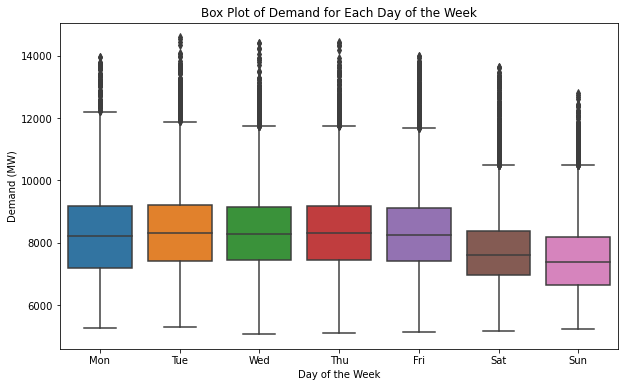

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='DAYOFWEEK', y='DEMAND', data=df_merge)

plt.xlabel('Day of the Week')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Demand (MW)')
plt.title('Box Plot of Demand for Each Day of the Week')

plt.show()

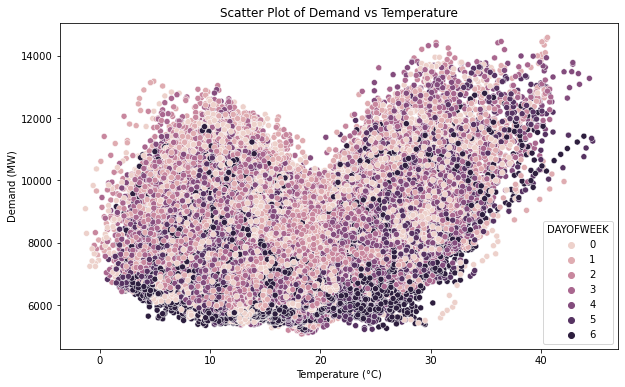

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TEMP', y='DEMAND', hue='DAYOFWEEK', data=df_merge)

plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.title('Scatter Plot of Demand vs Temperature')

plt.show()

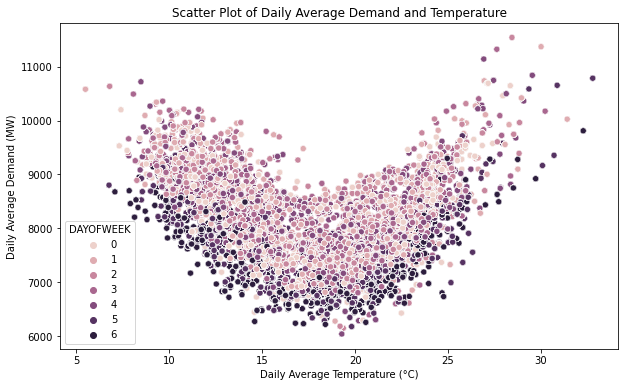

In [14]:
# Repeat above, but with average demand and temp
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DAILY_AVG_TEMP', y='DAILY_AVG_DEMAND', hue='DAYOFWEEK', data=df_merge)

plt.xlabel('Daily Average Temperature (°C)')
plt.ylabel('Daily Average Demand (MW)')
plt.title('Scatter Plot of Daily Average Demand and Temperature')

plt.show()

*Based on boxplot and scatter plot, day of the week is a significant predictor of demand. However, Mon-Fri appear similar so it may be worthwhile grouping these together as 'weekdays'.*

From Eugene's EDA:

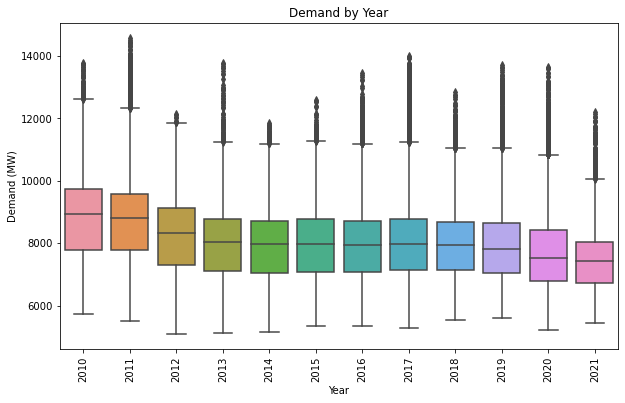

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_merge, x="YEAR", y="DEMAND")
plt.title("Demand by Year")
plt.xlabel("Year")
plt.ylabel("Demand (MW)")
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.show()


From Eugene's EDA

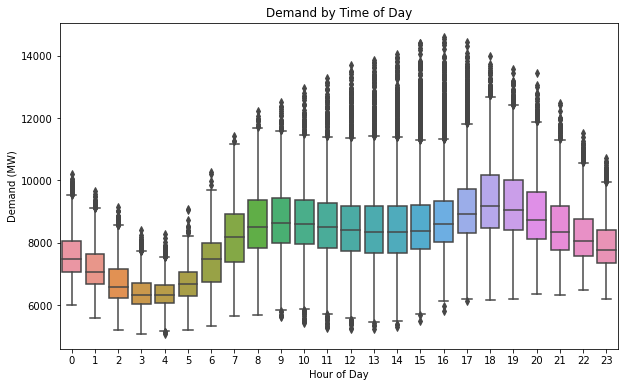

In [16]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_merge[df_merge["YEAR"] < 2021], x="HOUR", y="DEMAND")
plt.title("Demand by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Demand (MW)")
plt.show()


From the above boxplots, we can see that energy demand is trending downwards from 2010 to 2021. Also evident is the variability in demand throughout an average day.

It would be interesting to observe the hourly demand, but with each year in isolation. From the below, we can see that the decrease in demand from year to year is most significant from around 8am to 1pm. However, in more recent years, we can see in the evenings and overnight that demand has generally been increasing from one year to the next. 

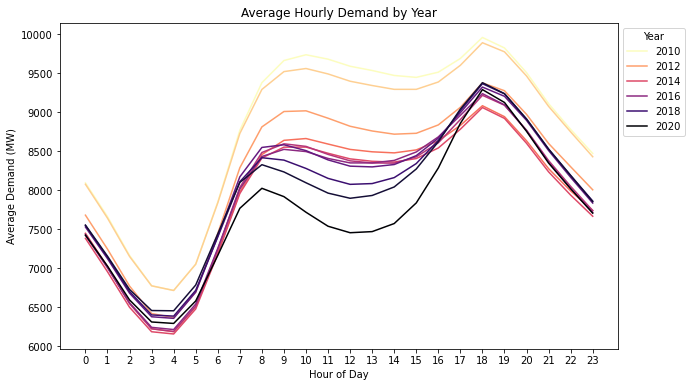

In [17]:
df_merge['HOURLY_AVG_DEMAND'] = df_merge.groupby(['YEAR', 'HOUR'])['DEMAND'].transform('mean')

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_merge[df_merge["YEAR"] < 2021], x='HOUR', y='DEMAND', hue='YEAR', ci=None, palette='magma_r')

plt.title('Average Hourly Demand by Year')
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand (MW)')
plt.xticks(range(0, 24))
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()

Undertaking the same analysis but with respect to month, we can see a pattern of seasonality with higher energy demand in summer and winter. The intuition behind these findings is that these are the months with more extreme temperatures.

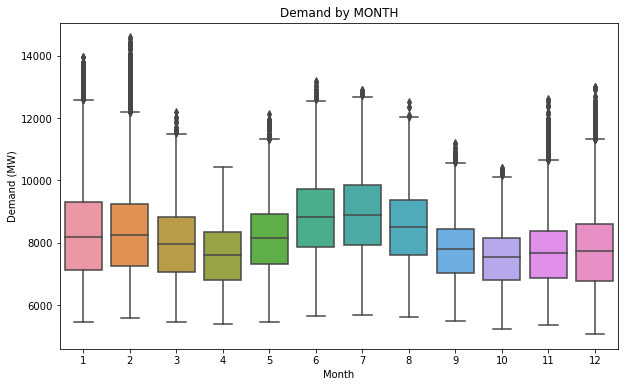

In [18]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df_merge, x="MONTH", y="DEMAND" )
plt.title("Demand by MONTH")
plt.xlabel("Month")
plt.ylabel("Demand (MW)")
plt.show()

In plotting the monthly average of each year in a line graph, similar to the hourly line graph above, 2010 and 2011 consistently have higher average demand than the following years. For the ease of interpretation, these years have been removed from the monthly chart below. For the remaining years, we can see a similar trend of decreasing demand from year to year for the off-peak months in autumn and spring. Meanwhile in summer and winter, there is less of a discernible pattern.

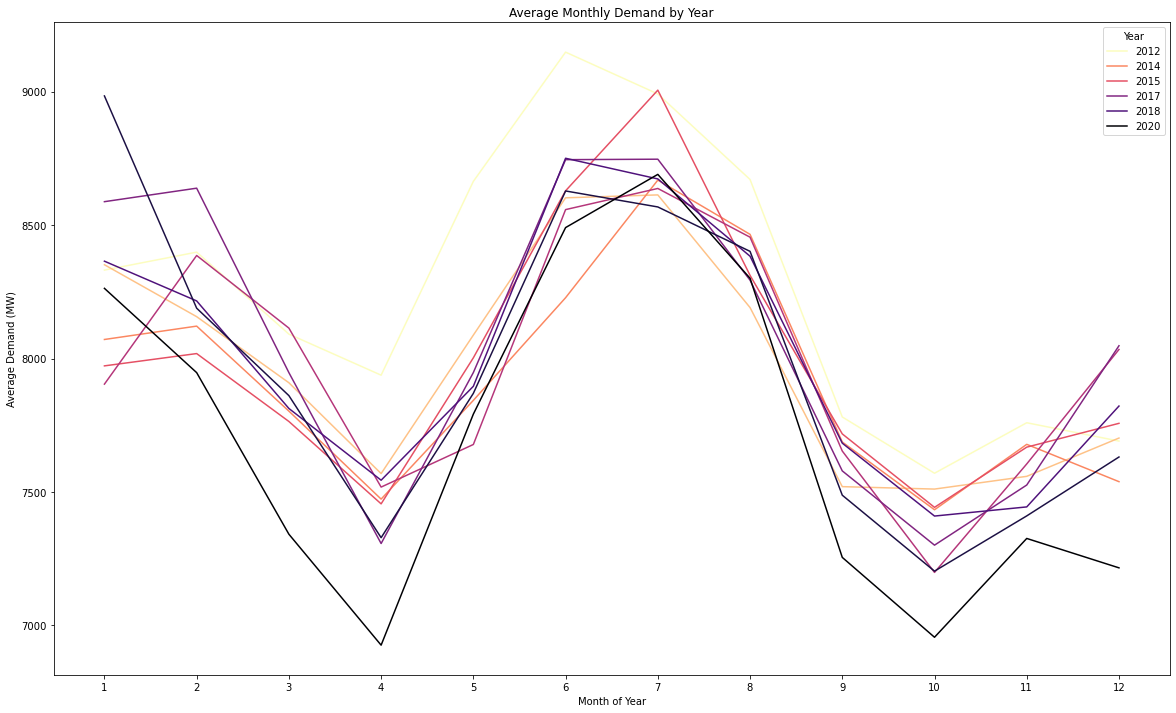

In [19]:
plt.figure(figsize=(20, 12))
sns.lineplot(data=df_merge[(df_merge["YEAR"] > 2011) & (df_merge["YEAR"] < 2021)], x='MONTH', y='DEMAND', hue='YEAR', ci=None, palette='magma_r')

plt.title('Average Monthly Demand by Year')
plt.xlabel('Month of Year')
plt.ylabel('Average Demand (MW)')
plt.xticks(range(1, 13))
plt.legend(title='Year', bbox_to_anchor=(1, 1))
plt.show()


## Addition to ENSO dataset

The below code takes the 'daily_enso.csv' file (created by 'daily_clean.py') and adds a column which includes BoM's ENSO classification as per their fortnightly 'ENSO Wrap-Up', archives for which are found here:
http://www.bom.gov.au/climate/enso/wrap-up/archive.shtml

This aims to smooth out the classification process set out in 'daily_clean.py'.

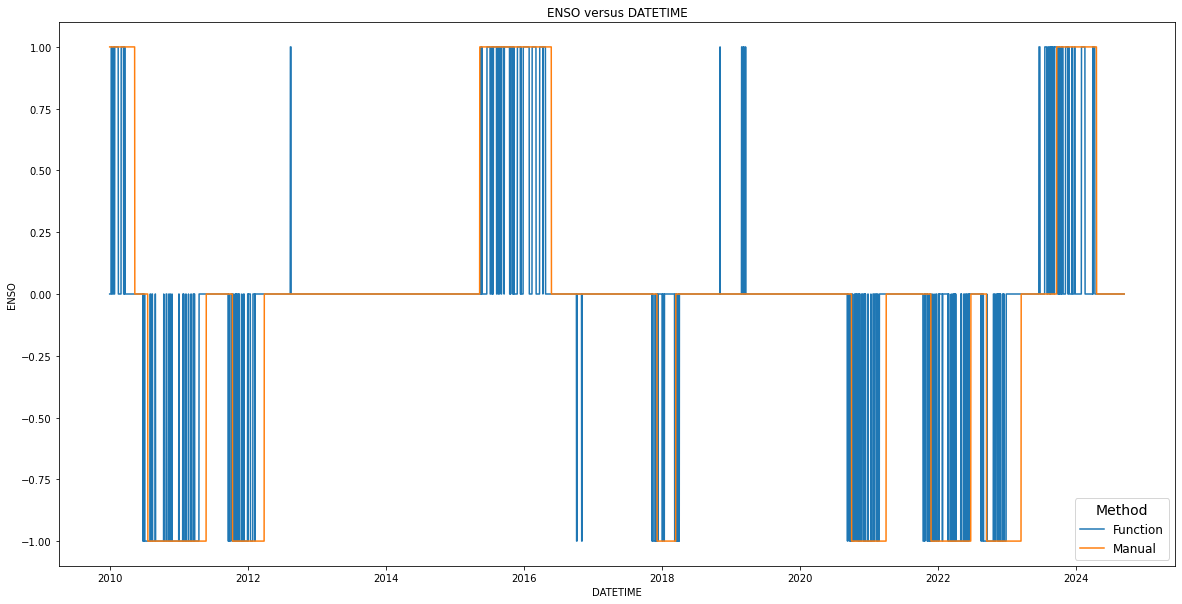

In [20]:
# Reload daily_enso.csv as dataframe
df_enso = pd.read_csv('../data/enso/daily_enso.csv', header=0)

# Add new column, initialised with every row as 0 (Neutral)
df_enso['BOM_CLASS'] = 0

# Add classification of 1 (El Niño) for following time periods:
# 31/12/2009 to 12/05/2010
# 12/05/2015 to 24/05/2016
# 19/09/2023 to 16/04/2024
df_enso.loc[(df_enso['DATETIME'] >= '2009-12-31') & (df_enso['DATETIME'] <= '2010-05-12'), 'BOM_CLASS'] = 1
df_enso.loc[(df_enso['DATETIME'] >= '2015-05-12') & (df_enso['DATETIME'] <= '2016-05-24'), 'BOM_CLASS'] = 1
df_enso.loc[(df_enso['DATETIME'] >= '2023-09-19') & (df_enso['DATETIME'] <= '2024-04-16'), 'BOM_CLASS'] = 1

# Add classification of -1 (La Niña) for following time periods:
# 21/07/2010 to 25/05/2011
# 12/10/2011 to 27/03/2012
# 05/12/2017 to 13/03/2018
# 29/09/2020 to 30/03/2021
# 23/11/2021 to 21/06/2022
# 13/09/2022 to 14/03/2023
df_enso.loc[(df_enso['DATETIME'] >= '2010-07-21') & (df_enso['DATETIME'] <= '2011-05-25'), 'BOM_CLASS'] = -1
df_enso.loc[(df_enso['DATETIME'] >= '2011-10-12') & (df_enso['DATETIME'] <= '2012-03-27'), 'BOM_CLASS'] = -1
df_enso.loc[(df_enso['DATETIME'] >= '2017-12-05') & (df_enso['DATETIME'] <= '2018-03-13'), 'BOM_CLASS'] = -1
df_enso.loc[(df_enso['DATETIME'] >= '2020-09-29') & (df_enso['DATETIME'] <= '2021-03-30'), 'BOM_CLASS'] = -1
df_enso.loc[(df_enso['DATETIME'] >= '2021-11-23') & (df_enso['DATETIME'] <= '2022-06-21'), 'BOM_CLASS'] = -1
df_enso.loc[(df_enso['DATETIME'] >= '2022-09-13') & (df_enso['DATETIME'] <= '2023-03-14'), 'BOM_CLASS'] = -1

# Fill in SST null value on 20/08/2017
df_enso.loc[(df_enso['DATETIME'] == '2017-08-20'), 'SST_DIFF'] = df_enso['SST_DIFF'].ffill()


# Plot to compare this method with function used in 'daily_clean.py'
df_enso['DATETIME'] = pd.to_datetime(df_enso['DATETIME'])
plt.figure(figsize=(20,10))
plt.plot(df_enso['DATETIME'], df_enso['enso'], label='Function')
plt.plot(df_enso['DATETIME'], df_enso['BOM_CLASS'], label='Manual')
plt.xlabel('DATETIME')
plt.ylabel('ENSO')
plt.legend(title='Method', title_fontsize=14, fontsize=12, loc='lower right')
plt.title('ENSO versus DATETIME')
plt.show()


## Alternative ML Dataset

The below code takes the 'data_for_ml.csv' file (created by 'join_data_for_ml.py') and adds the above modified ENSO dataset. It also adds a few extra columns with time periods that are reasonably correlated with energy demand.

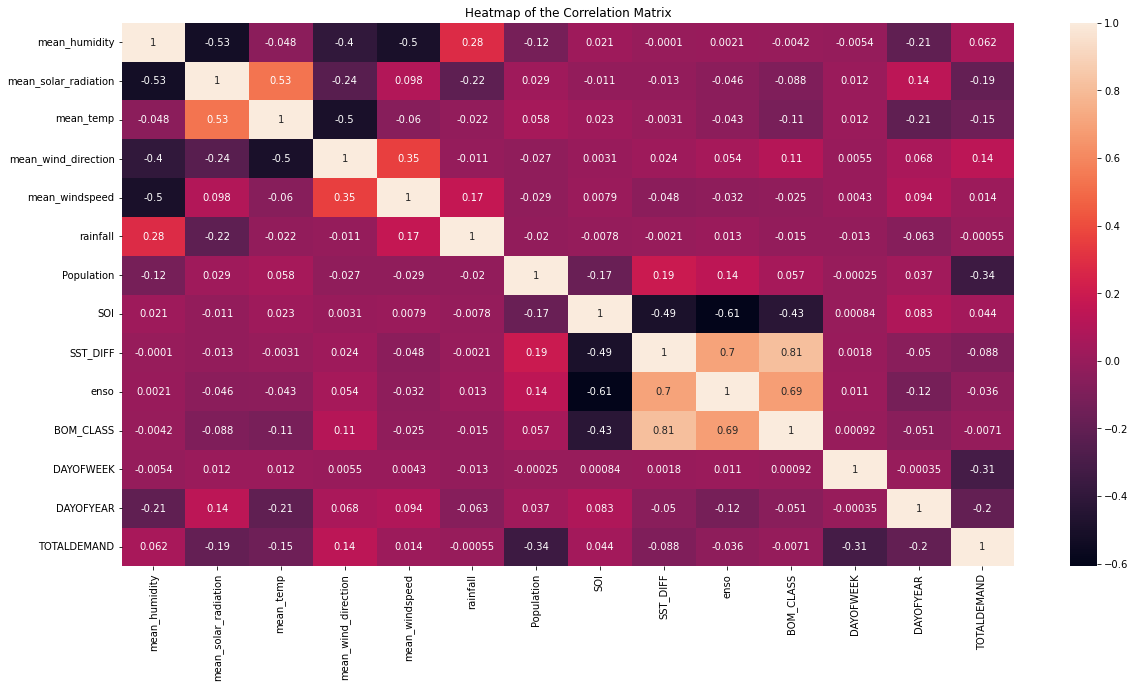

In [21]:
# Load data_for_ml.csv as dataframe
df_ML = pd.read_csv('../data/NSW/data_for_ml.csv', header=0)

# Convert 'Date' column to Datetime date type
df_ML['Date'] = pd.to_datetime(df_ML['Date'])


# Would like to add additional ENSO data,
# first need to drop 'enso' columnn, as this already in main dataframe
df_enso.drop(columns=['enso'], inplace=True)

# Rename datetime column, to allow for join
df_enso.rename(columns={'DATETIME': 'Date'}, inplace=True)

# Add extra ENSO data to main dataframe
df_ML = pd.merge(df_ML, df_enso, on='Date', how='left')


# Adding columns to allow analysis of various time periods
df_ML['DAYOFWEEK'] = df_ML['Date'].dt.weekday
df_ML['DAYOFYEAR'] = df_ML['Date'].dt.dayofyear


# Reorder columns
cols = df_ML.columns.tolist()
cols = cols[:2] + cols[3:9] + cols[10:12] + [cols[2]] + [cols[12]] + cols[13:] + [cols[9]]
df_ML = df_ML[cols]


# Correlation heatmap
df_ML.drop(['Date'], axis=1, inplace=True)

plt.figure(figsize=(20,10))
sns.heatmap(df_ML.corr(), annot=True)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

## Premliminary ML models
taken from Tom's EDA

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler


mldat = df_ML.copy()
#drop the Date column - already done
#mldat.drop(['Date'], axis=1, inplace=True)


#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("the RMSE of the linear regression model is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The accuracy of the linear regression model is: ", model.score(X_test, y_test))

#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("the RMSE of the random forest regression model is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The accuracy of the random forest regression model is: ", model.score(X_test, y_test))

#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("the RMSE of the XGBoost regression model is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The accuracy of the XGBoost regression model is: ", model.score(X_test, y_test))


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("the RMSE of the mlp regression model is: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("The accuracy of the mlp regression model is: ", model.score(X_test, y_test))

the RMSE of the linear regression model is:  0.8239081724098634
The accuracy of the linear regression model is:  0.31854932048621554
the RMSE of the random forest regression model is:  0.3152991506806173
The accuracy of the random forest regression model is:  0.9002018686838782
the RMSE of the XGBoost regression model is:  0.27350894591985087
The accuracy of the XGBoost regression model is:  0.9249034684075202
the RMSE of the mlp regression model is:  0.405029144471965
The accuracy of the mlp regression model is:  0.8353167774139477


Repeat above, but with no ENSO data. Aim is to compare the performance of these models with those where ENSO is included.

In [23]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()

# Drop ENSO columns
mldat.drop(columns=['SOI', 'SST_DIFF', 'enso', 'BOM_CLASS'], inplace=True)

# Print remaining ENSO columns
print('ENSO columns', '\n', mldat.columns[7:-3], '\n')


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_mse_0 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
lr_R2_0 = round(model.score(X_test, y_test),5)
print("the RMSE of the linear regression model is: ", lr_mse_0)
print("The R-squared of the linear regression model is: ", lr_R2_0)


#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_mse_0 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
rf_R2_0 = round(model.score(X_test, y_test),5)
print("the RMSE of the random forest regression model is: ", rf_mse_0)
print("The R-squared of the random forest regression model is: ", rf_R2_0)


#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_0 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_0 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_0)
print("The R-squared of the XGBoost regression model is: ", xgb_R2_0)


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mlp_mse_0 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
mlp_R2_0 = round(model.score(X_test, y_test),5)
print("the RMSE of the mlp regression model is: ", mlp_mse_0)
print("The R-squared of the mlp regression model is: ", mlp_R2_0)

ENSO columns 
 Index([], dtype='object') 

the RMSE of the linear regression model is:  0.82282
The R-squared of the linear regression model is:  0.32035
the RMSE of the random forest regression model is:  0.3125
The R-squared of the random forest regression model is:  0.90197
the RMSE of the XGBoost regression model is:  0.26998
The R-squared of the XGBoost regression model is:  0.92683
the RMSE of the mlp regression model is:  0.40947
The R-squared of the mlp regression model is:  0.83168


Repeat above, but with ENSO indicators included, and no classification.

In [24]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()

# Drop ENSO columns
mldat.drop(columns=['enso', 'BOM_CLASS'], inplace=True)

# Print remaining ENSO columns
print('ENSO columns', '\n', mldat.columns[7:-3], '\n')


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_mse_1 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
lr_R2_1 = round(model.score(X_test, y_test),5)
print("the RMSE of the linear regression model is: ", lr_mse_1, "\t" * 3, "Diff:", round(lr_mse_1 - lr_mse_0, 6))
print("The R-squared of the linear regression model is: ", lr_R2_1, "\t" * 2, "Diff:", round(lr_R2_1 - lr_R2_0, 6))


#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_mse_1 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
rf_R2_1 = round(model.score(X_test, y_test),5)
print("the RMSE of the random forest regression model is: ", rf_mse_1, "\t" * 2, "Diff:", round(rf_mse_1 - rf_mse_0, 6))
print("The R-squared of the random forest regression model is: ", rf_R2_1, "\t", "Diff:", round(rf_R2_1 - rf_R2_0, 6))


#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_1 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_1 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_1, "\t" * 3, "Diff:", round(xgb_mse_1 - xgb_mse_0, 6))
print("The R-squared of the XGBoost regression model is: ", xgb_R2_1, "\t" * 2, "Diff:", round(xgb_R2_1 - xgb_R2_0, 6))


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mlp_mse_1 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
mlp_R2_1 = round(model.score(X_test, y_test),5)
print("the RMSE of the mlp regression model is: ", mlp_mse_1, "\t" * 3, "Diff:", round(mlp_mse_1 - mlp_mse_0, 6))
print("The R-squared of the mlp regression model is: ", mlp_R2_1, "\t" * 3, "Diff:", round(mlp_R2_1 - mlp_R2_0, 6))

ENSO columns 
 Index(['SOI', 'SST_DIFF'], dtype='object') 

the RMSE of the linear regression model is:  0.82316 			 Diff: 0.00034
The R-squared of the linear regression model is:  0.31979 		 Diff: -0.00056
the RMSE of the random forest regression model is:  0.31381 		 Diff: 0.00131
The R-squared of the random forest regression model is:  0.90114 	 Diff: -0.00083
the RMSE of the XGBoost regression model is:  0.27509 			 Diff: 0.00511
The R-squared of the XGBoost regression model is:  0.92403 		 Diff: -0.0028
the RMSE of the mlp regression model is:  0.41225 			 Diff: 0.00278
The R-squared of the mlp regression model is:  0.82939 			 Diff: -0.00229


Repeat above, but with original ENSO classification included, and no indicators.

In [25]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()

# Drop ENSO columns
mldat.drop(columns=['SST_DIFF', 'SOI', 'BOM_CLASS'], inplace=True)

# Print remaining ENSO columns
print('ENSO columns', '\n', mldat.columns[7:-3], '\n')


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_mse_2 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
lr_R2_2 = round(model.score(X_test, y_test),5)
print("the RMSE of the linear regression model is: ", lr_mse_2, "\t" * 3, "Diff:", round(lr_mse_2 - lr_mse_0, 6))
print("The R-squared of the linear regression model is: ", lr_R2_2, "\t" * 2, "Diff:", round(lr_R2_2 - lr_R2_0, 6))


#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_mse_2 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
rf_R2_2 = round(model.score(X_test, y_test),5)
print("the RMSE of the random forest regression model is: ", rf_mse_2, "\t" * 2, "Diff:", round(rf_mse_2 - rf_mse_0, 6))
print("The R-squared of the random forest regression model is: ", rf_R2_2, "\t", "Diff:", round(rf_R2_2 - rf_R2_0, 6))


#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_2 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_2 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_2, "\t" * 3, "Diff:", round(xgb_mse_2 - xgb_mse_0, 6))
print("The R-squared of the XGBoost regression model is: ", xgb_R2_2, "\t" * 2, "Diff:", round(xgb_R2_2 - xgb_R2_0, 6))


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mlp_mse_2 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
mlp_R2_2 = round(model.score(X_test, y_test),5)
print("the RMSE of the mlp regression model is: ", mlp_mse_2, "\t" * 3, "Diff:", round(mlp_mse_2 - mlp_mse_0, 6))
print("The R-squared of the mlp regression model is: ", mlp_R2_2, "\t" * 3, "Diff:", round(mlp_R2_2 - mlp_R2_0, 6))

ENSO columns 
 Index(['enso'], dtype='object') 

the RMSE of the linear regression model is:  0.82301 			 Diff: 0.00019
The R-squared of the linear regression model is:  0.32003 		 Diff: -0.00032
the RMSE of the random forest regression model is:  0.31056 		 Diff: -0.00194
The R-squared of the random forest regression model is:  0.90318 	 Diff: 0.00121
the RMSE of the XGBoost regression model is:  0.26981 			 Diff: -0.00017
The R-squared of the XGBoost regression model is:  0.92692 		 Diff: 9e-05
the RMSE of the mlp regression model is:  0.39569 			 Diff: -0.01378
The R-squared of the mlp regression model is:  0.84282 			 Diff: 0.01114


Repeat above, but with BOM ENSO classification included, and no indicators.

In [26]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()

# Drop ENSO columns
mldat.drop(columns=['SST_DIFF', 'SOI', 'enso'], inplace=True)

# Print remaining ENSO columns
print('ENSO columns', '\n', mldat.columns[7:-3], '\n')


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_mse_3 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
lr_R2_3 = round(model.score(X_test, y_test),5)
print("the RMSE of the linear regression model is: ", lr_mse_3, "\t" * 3, "Diff:", round(lr_mse_3 - lr_mse_0, 6))
print("The R-squared of the linear regression model is: ", lr_R2_3, "\t" * 2, "Diff:", round(lr_R2_3 - lr_R2_0, 6))


#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_mse_3 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
rf_R2_3 = round(model.score(X_test, y_test),5)
print("the RMSE of the random forest regression model is: ", rf_mse_3, "\t" * 2, "Diff:", round(rf_mse_3 - rf_mse_0, 6))
print("The R-squared of the random forest regression model is: ", rf_R2_3, "\t", "Diff:", round(rf_R2_3 - rf_R2_0, 6))


#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_3 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_3 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_3, "\t" * 3, "Diff:", round(xgb_mse_3 - xgb_mse_0, 6))
print("The R-squared of the XGBoost regression model is: ", xgb_R2_3, "\t" * 2, "Diff:", round(xgb_R2_3 - xgb_R2_0, 6))


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mlp_mse_3 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
mlp_R2_3 = round(model.score(X_test, y_test),5)
print("the RMSE of the mlp regression model is: ", mlp_mse_3, "\t" * 3, "Diff:", round(mlp_mse_3 - mlp_mse_0, 6))
print("The R-squared of the mlp regression model is: ", mlp_R2_3, "\t" * 3, "Diff:", round(mlp_R2_3 - mlp_R2_0, 6))

ENSO columns 
 Index(['BOM_CLASS'], dtype='object') 

the RMSE of the linear regression model is:  0.82512 			 Diff: 0.0023
The R-squared of the linear regression model is:  0.31655 		 Diff: -0.0038
the RMSE of the random forest regression model is:  0.31207 		 Diff: -0.00043
The R-squared of the random forest regression model is:  0.90224 	 Diff: 0.00027
the RMSE of the XGBoost regression model is:  0.27441 			 Diff: 0.00443
The R-squared of the XGBoost regression model is:  0.92441 		 Diff: -0.00242
the RMSE of the mlp regression model is:  0.40465 			 Diff: -0.00482
The R-squared of the mlp regression model is:  0.83563 			 Diff: 0.00395


Repeat above, but with BOM ENSO classification included, as well as indicators.

In [27]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()

# Drop ENSO columns
mldat.drop(columns=['enso'], inplace=True)

# Print remaining ENSO columns
print('ENSO columns', '\n', mldat.columns[7:-3], '\n')


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_mse_4 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
lr_R2_4 = round(model.score(X_test, y_test),5)
print("the RMSE of the linear regression model is: ", lr_mse_4, "\t" * 3, "Diff:", round(lr_mse_4 - lr_mse_0, 6))
print("The R-squared of the linear regression model is: ", lr_R2_4, "\t" * 2, "Diff:", round(lr_R2_4 - lr_R2_0, 6))


#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_mse_4 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
rf_R2_4 = round(model.score(X_test, y_test),5)
print("the RMSE of the random forest regression model is: ", rf_mse_4, "\t" * 2, "Diff:", round(rf_mse_4 - rf_mse_0, 6))
print("The R-squared of the random forest regression model is: ", rf_R2_4, "\t", "Diff:", round(rf_R2_4 - rf_R2_0, 6))


#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_4 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_4 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_4, "\t" * 3, "Diff:", round(xgb_mse_4 - xgb_mse_0, 6))
print("The R-squared of the XGBoost regression model is: ", xgb_R2_4, "\t" * 2, "Diff:", round(xgb_R2_4 - xgb_R2_0, 6))


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mlp_mse_4 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
mlp_R2_4 = round(model.score(X_test, y_test),5)
print("the RMSE of the mlp regression model is: ", mlp_mse_4, "\t" * 3, "Diff:", round(mlp_mse_4 - mlp_mse_0, 6))
print("The R-squared of the mlp regression model is: ", mlp_R2_4, "\t" * 3, "Diff:", round(mlp_R2_4 - mlp_R2_0, 6))

ENSO columns 
 Index(['SOI', 'SST_DIFF', 'BOM_CLASS'], dtype='object') 

the RMSE of the linear regression model is:  0.82381 			 Diff: 0.00099
The R-squared of the linear regression model is:  0.31872 		 Diff: -0.00163
the RMSE of the random forest regression model is:  0.31471 		 Diff: 0.00221
The R-squared of the random forest regression model is:  0.90058 	 Diff: -0.00139
the RMSE of the XGBoost regression model is:  0.2722 			 Diff: 0.00222
The R-squared of the XGBoost regression model is:  0.92562 		 Diff: -0.00121
the RMSE of the mlp regression model is:  0.40156 			 Diff: -0.00791
The R-squared of the mlp regression model is:  0.83813 			 Diff: 0.00645


Repeat above, but with Original ENSO classification included, as well as indicators.

In [28]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()

# Drop ENSO columns
mldat.drop(columns=['BOM_CLASS'], inplace=True)

# Print remaining ENSO columns
print('ENSO columns', '\n', mldat.columns[7:-3], '\n')


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

lr_mse_5 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
lr_R2_5 = round(model.score(X_test, y_test),5)
print("the RMSE of the linear regression model is: ", lr_mse_5, "\t" * 3, "Diff:", round(lr_mse_5 - lr_mse_0, 6))
print("The R-squared of the linear regression model is: ", lr_R2_5, "\t" * 2, "Diff:", round(lr_R2_5 - lr_R2_0, 6))


#run an random forest regression model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rf_mse_5 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
rf_R2_5 = round(model.score(X_test, y_test),5)
print("the RMSE of the random forest regression model is: ", rf_mse_5, "\t" * 2, "Diff:", round(rf_mse_5 - rf_mse_0, 6))
print("The R-squared of the random forest regression model is: ", rf_R2_5, "\t", "Diff:", round(rf_R2_5 - rf_R2_0, 6))


#run a XGBoost regression model
from xgboost import XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_5 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_5 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_5, "\t" * 3, "Diff:", round(xgb_mse_5 - xgb_mse_0, 6))
print("The R-squared of the XGBoost regression model is: ", xgb_R2_5, "\t" * 2, "Diff:", round(xgb_R2_5 - xgb_R2_0, 6))


#run a mlp regression model
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(solver= 'sgd', max_iter=1000, hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mlp_mse_5 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
mlp_R2_5 = round(model.score(X_test, y_test),5)
print("the RMSE of the mlp regression model is: ", mlp_mse_5, "\t" * 3, "Diff:", round(mlp_mse_5 - mlp_mse_0, 6))
print("The R-squared of the mlp regression model is: ", mlp_R2_5, "\t" * 3, "Diff:", round(mlp_R2_5 - mlp_R2_0, 6))

ENSO columns 
 Index(['SOI', 'SST_DIFF', 'enso'], dtype='object') 

the RMSE of the linear regression model is:  0.82317 			 Diff: 0.00035
The R-squared of the linear regression model is:  0.31977 		 Diff: -0.00058
the RMSE of the random forest regression model is:  0.31529 		 Diff: 0.00279
The R-squared of the random forest regression model is:  0.90021 	 Diff: -0.00176
the RMSE of the XGBoost regression model is:  0.27404 			 Diff: 0.00406
The R-squared of the XGBoost regression model is:  0.92461 		 Diff: -0.00222
the RMSE of the mlp regression model is:  0.40768 			 Diff: -0.00179
The R-squared of the mlp regression model is:  0.83315 			 Diff: 0.00147


The effect of the ENSO variables on the peformance of (untuned) models appears insignificant. From the above (based on this random state), the best performance is found when using only the original ENSO classification, and excluding the ENSO indicators.

Looking below at the plot of feature importance (when using XGBoost on whole dataset), all ENSO variables rate relatively low.

the RMSE of the XGBoost regression model is:  0.27351 			 Diff: 0.00353
The R-squared of the XGBoost regression model is:  0.9249 		 Diff: -0.00193
                 Feature  Importance
2              mean_temp    0.308178
11             DAYOFWEEK    0.279165
6             Population    0.207174
12             DAYOFYEAR    0.130555
1   mean_solar_radiation    0.013199
10             BOM_CLASS    0.013134
5               rainfall    0.010821
8               SST_DIFF    0.007412
4         mean_windspeed    0.007290
7                    SOI    0.006249
0          mean_humidity    0.006248
9                   enso    0.005479
3    mean_wind_direction    0.005095


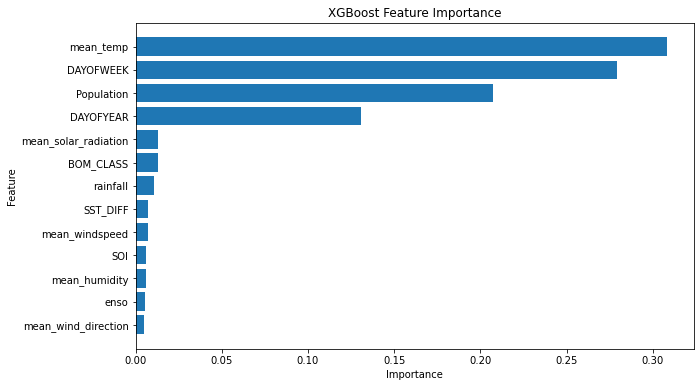

In [29]:
# Reassign 'mldat' as full dataframe
mldat = df_ML.copy()


# Run Models, copied from code above

#normalise the data
scaler = StandardScaler()
mldat = pd.DataFrame(scaler.fit_transform(mldat), columns=mldat.columns)

X = mldat.iloc[:, :-1]
y = mldat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#run a XGBoost regression model
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xgb_mse_6 = round(np.sqrt(mean_squared_error(y_test, y_pred)),5)
xgb_R2_6 = round(model.score(X_test, y_test),5)
print("the RMSE of the XGBoost regression model is: ", xgb_mse_6, "\t" * 3, "Diff:", round(xgb_mse_6 - xgb_mse_0, 6))
print("The R-squared of the XGBoost regression model is: ", xgb_R2_6, "\t" * 2, "Diff:", round(xgb_R2_6 - xgb_R2_0, 6))


# Determine feature importance
feature_importances = model.feature_importances_

features = X_train.columns  # Get the feature names
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df)

plt.figure(figsize=(10,6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()